In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import intake,yaml
import intake_esm
from scipy import special
import keras
from keras.models import Model
from keras.layers import Dense, Input

In [2]:
def latest_version(cat):#this function gets the latest version of our catalog
    """
    input
    cat: esmdatastore
    output
    esmdatastore with latest DRS versions
    """
    latest_cat = cat.df.sort_values(by=['version','path']).drop_duplicates(['temporal subset','model','mip_table',
                                               'institute','variable','ensemble_member',
                                               'grid_label','experiment_id'],keep='last')
    return latest_cat


In [3]:
col_url = "https://cmip6-nc.s3.us-east-2.amazonaws.com/esgf-world.json" 
col = intake.open_esm_datastore(col_url)
esmcol_data = col.esmcol_data

In [4]:
model_name = 'GFDL-ESM4'

In [5]:
#mlotst, tos,uo,vo

In [6]:
#tos_ sea surface temperature
#area cello
#ofx ocean fixed
#omon  ocean monthly average 

In [7]:

query_Omon_tos = dict(experiment_id=['abrupt-4xCO2','1pctCO2','historical'],
                 mip_table=['Omon'],
                 ensemble_member=["r1i1p1f1","r1i1p1f2"],
                 model= model_name,
                 grid_label=['gn'],
                 variable=["tos"])
query_Ofx = dict(experiment_id=['abrupt-4xCO2','1pctCO2','historical'],
                 mip_table=['Ofx'],
                 #ensemble_member=["r1i1p1f1","r1i1p1f2"],
                 model= model_name,
                 grid_label=['gn'],
                 variable=["areacello"])

In [8]:
def pp_enso(ds):
    ds = ds.copy()   #the wrapper function makes a copy of the ds and works from this
    ds = rename_cmip6(ds)
    ds = fix_time(ds)
    #ds = fix_units(ds)
    #ds = correct_units(ds)
    return ds

In [9]:
cat_Omon_tos = col.search(**query_Omon_tos)
cat_Omon_tos_lat = latest_version(cat_Omon_tos)

cat_Omon_tos_latest = intake.open_esm_datastore(cat_Omon_tos_lat,esmcol_data=esmcol_data)

In [10]:
cat_Omon_tos_latest.df

,project,institute,model,experiment_id,frequency,modeling_realm,mip_table,ensemble_member,grid_label,variable,temporal subset,version,path
0,CMIP6,NOAA-GFDL,GFDL-ESM4,1pctCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,000101-002012,v20180701,s3://esgf-world/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4...
1,CMIP6,NOAA-GFDL,GFDL-ESM4,1pctCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,002101-004012,v20180701,s3://esgf-world/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4...
2,CMIP6,NOAA-GFDL,GFDL-ESM4,1pctCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,004101-006012,v20180701,s3://esgf-world/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4...
3,CMIP6,NOAA-GFDL,GFDL-ESM4,1pctCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,006101-008012,v20180701,s3://esgf-world/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4...
4,CMIP6,NOAA-GFDL,GFDL-ESM4,1pctCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,008101-010012,v20180701,s3://esgf-world/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4...
5,CMIP6,NOAA-GFDL,GFDL-ESM4,1pctCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,010101-012012,v20180701,s3://esgf-world/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4...
6,CMIP6,NOAA-GFDL,GFDL-ESM4,1pctCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,012101-014012,v20180701,s3://esgf-world/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4...
7,CMIP6,NOAA-GFDL,GFDL-ESM4,1pctCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,014101-015012,v20180701,s3://esgf-world/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4...
8,CMIP6,NOAA-GFDL,GFDL-ESM4,abrupt-4xCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,000101-002012,v20180701,s3://esgf-world/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4...
9,CMIP6,NOAA-GFDL,GFDL-ESM4,abrupt-4xCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,002101-004012,v20180701,s3://esgf-world/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4...


In [11]:
cat_Ofx = col.search(**query_Ofx)
cat_Ofx_lat = latest_version(cat_Ofx)

cat_Ofx_latest = intake.open_esm_datastore(cat_Ofx_lat,esmcol_data=esmcol_data)

In [12]:
dict_Omon_tos = cat_Omon_tos_latest.to_dataset_dict(storage_options=dict(anon=True), cdf_kwargs={'decode_times': True,'chunks': {'time': 1}})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'project.institute.model.experiment_id.mip_table'


In [13]:
dict_Ofx = cat_Ofx_latest.to_dataset_dict(storage_options=dict(anon=True),cdf_kwargs={'decode_times': True,'chunks': {}})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'project.institute.model.experiment_id.mip_table'


In [14]:
dict_Omon_tos.keys()

dict_keys(['CMIP6.NOAA-GFDL.GFDL-ESM4.1pctCO2.Omon', 'CMIP6.NOAA-GFDL.GFDL-ESM4.abrupt-4xCO2.Omon', 'CMIP6.NOAA-GFDL.GFDL-ESM4.historical.Omon'])

In [15]:
ds_Ofx = dict_Ofx["CMIP6.NOAA-GFDL.GFDL-ESM4.historical.Ofx"] #xarray dataset object to access Ofx areacello dataset used to calculate the weighted average

CALCULATING the summation of areacello

In [16]:
#TODO INSERT CELL SELECT region of interest in areacello
areacello_nino3 = ds_Ofx.areacello.sel(y = slice(-5,5), x = slice(-150,-90))

In [17]:
areacello_nino3

<xarray.DataArray 'areacello' (ensemble_member: 1, y: 39, x: 120)>
dask.array<getitem, shape=(1, 39, 120), dtype=float32, chunksize=(1, 39, 120), chunktype=numpy.ndarray>
Coordinates:
    lat              (y, x) float32 dask.array<chunksize=(39, 120), meta=np.ndarray>
    lon              (y, x) float32 dask.array<chunksize=(39, 120), meta=np.ndarray>
  * x                (x) float64 -149.8 -149.2 -148.8 ... -91.25 -90.75 -90.25
  * y                (y) float64 -4.872 -4.615 -4.359 ... 4.359 4.615 4.872
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'
Attributes:
    cell_methods:   area: sum
    long_name:      Grid-Cell Area
    standard_name:  cell_area
    units:          m2
    original_name:  areacello

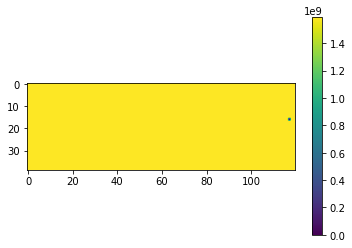

In [18]:
#areacello_nino3.isel(time=0).plot()
plt.imshow(areacello_nino3[0])
plt.colorbar()

In [19]:
#TODO 
#CALCULATE total_areacello, summation across lat,lon (in our dataset y,x respectively)

total_areacello = areacello_nino3.sum(dim=('x', 'y'))


NINO3 INDEX CALCULATION 

REGION 

(5S-5N , 150W-90W) 

SELECT tos and areacello for the region of interest

# Historical

In [49]:
ds_hist = dict_Omon_tos["CMIP6.NOAA-GFDL.GFDL-ESM4.historical.Omon"]


In [21]:
tm_his_st, tm_his_nd = '1980','2011'

In [22]:
ds_hist.time

<xarray.DataArray 'time' (time: 1980)>
array([cftime.DatetimeNoLeap(1850, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 2, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 3, 16, 12, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2014, 10, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 12, 16, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
Attributes:
    long_name:      time
    axis:           T
    calendar_type:  noleap
    bounds:         time_bnds
    standard_name:  time
    description:    Temporal mean

In [23]:
#TODO INSERT CORRECT CODE TO SELECT SPECIFIED REGION (lat range and lon range) in TOS 
#tos = ds.tos......
tos_his = ds_hist.tos.sel(y = slice(-5,5), x = slice(-150,-90), time = slice(tm_his_st, tm_his_nd))
tos_his

<xarray.DataArray 'tos' (ensemble_member: 1, time: 384, y: 39, x: 120)>
dask.array<getitem, shape=(1, 384, 39, 120), dtype=float32, chunksize=(1, 1, 39, 120), chunktype=numpy.ndarray>
Coordinates:
    lat              (y, x) float32 dask.array<chunksize=(39, 120), meta=np.ndarray>
    lon              (y, x) float32 dask.array<chunksize=(39, 120), meta=np.ndarray>
  * time             (time) object 1980-01-16 12:00:00 ... 2011-12-16 12:00:00
  * x                (x) float64 -149.8 -149.2 -148.8 ... -91.25 -90.75 -90.25
  * y                (y) float64 -4.872 -4.615 -4.359 ... 4.359 4.615 4.872
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'
Attributes:
    long_name:      Sea Surface Temperature
    units:          degC
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello
    standard_name:  sea_surface_temperature
    original_name:  tos

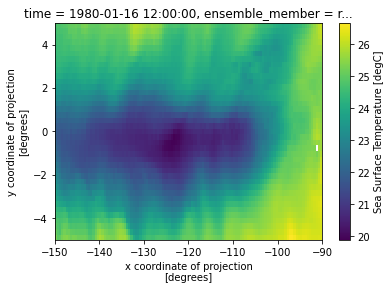

In [24]:
tos_his.isel(time=0).plot()

In [25]:
1797120/4680

384.0

##### CALCULATE SEA SURFACE TEMPERATURE WEIGHTED AVERAGE

In [26]:
tos_his.size

1797120

In [27]:
areacello_nino3.size

4680

In [28]:
total_areacello.size

1

In [57]:
tos_mean_nino3_his = (tos_his * areacello_nino3).sum(dim=('x', 'y')) / total_areacello


In [30]:
tos_mean_nino3_his = tos_mean_nino3_his.compute()

In [31]:
tos_mean_nino3_his.size #1980 values, 1 value per month , 12 per year for 165 years

384

In [32]:
tos_mean_nino3_his.isel(time=0).compute()

<xarray.DataArray (ensemble_member: 1)>
array([23.493881], dtype=float32)
Coordinates:
    time             object 1980-01-16 12:00:00
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'

In [33]:
datetimeindex = tos_mean_nino3_his.indexes['time'].to_datetimeindex()
tos_mean_nino3_his['time'] = datetimeindex


<ipython-input-33-e7b25880c2d7>:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = tos_mean_nino3_his.indexes['time'].to_datetimeindex()


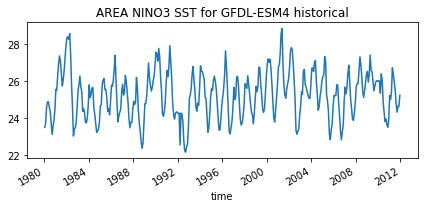

In [34]:
tos_mean_nino3_his.sel(time=slice(tm_his_st, tm_his_nd)).plot(aspect=2, size=3)
plt.title(f"AREA NINO3 SST for {model_name} historical")
plt.tight_layout()
plt.draw()
plt.savefig(f"{model_name}_SST_Hist_{tm_his_st}_{tm_his_nd}.png")

##### CLIMATOLOGY (average all Jans, Febs, etc) CALC EXAMPLES (YEARS NEED A TWEAK, calculate for 20 year chunks or as needed)

In [35]:
tos_nino3_climatology = tos_mean_nino3_his.sel(time=slice(tm_his_st, tm_his_nd)).groupby('time.month').mean(dim='time')


In [36]:
tos_nino3_climatology = tos_nino3_climatology.compute()

In [37]:
#tos_nino3_climatology.sum().plot()

In [38]:
tos_nino3_climatology

<xarray.DataArray (ensemble_member: 1, month: 12)>
array([[25.792765, 25.760628, 25.955544, 26.632011, 26.457462, 25.625278,
        24.961483, 24.196123, 23.960104, 24.169205, 24.449192, 25.143965]],
      dtype=float32)
Coordinates:
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'
  * month            (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [39]:
print(tos_nino3_climatology)

<xarray.DataArray (ensemble_member: 1, month: 12)>
array([[25.792765, 25.760628, 25.955544, 26.632011, 26.457462, 25.625278,
        24.961483, 24.196123, 23.960104, 24.169205, 24.449192, 25.143965]],
      dtype=float32)
Coordinates:
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'
  * month            (month) int64 1 2 3 4 5 6 7 8 9 10 11 12


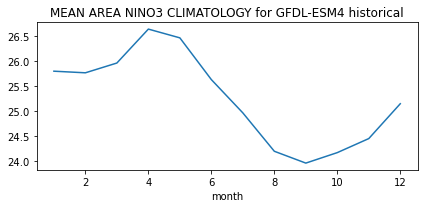

In [40]:
tos_nino3_climatology.plot(aspect=2, size=3)
plt.title(f"MEAN AREA NINO3 CLIMATOLOGY for {model_name} historical")
plt.tight_layout()
plt.draw()
plt.savefig(f"{model_name}_Clima_Hist_{tm_his_st}_{tm_his_nd}.png")

##### NINO3 SST ANOMALY

monthly anomaly of SST (or TOS here) over the Nino3 region

we subtract the monthly climatology values calculated above from the TOS value values and then do
a spatial average across the region of interest

In [41]:
tos_sel = tos_his.sel(time=slice(tm_his_st, tm_his_nd))
index_nino3 = (tos_sel.groupby('time.month')-tos_nino3_climatology).mean(dim=['x','y'])

In [42]:
index_nino3 = index_nino3.compute()

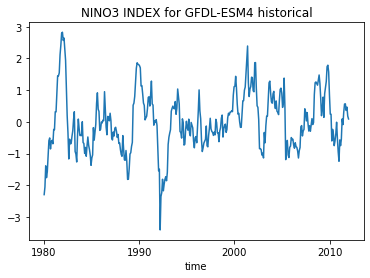

In [43]:
#datetimeindex = index_nino3.indexes['time'].to_datetimeindex()
#index_nino3['time'] = datetimeindex
index_nino3.plot()
plt.title(f"NINO3 INDEX for {model_name} historical")
plt.savefig(f"{model_name}_Nino3Idx_Hist_{tm_his_st}_{tm_his_nd}.png")

In [44]:
np.save("index_nino3_hist.npy", np.array(index_nino3))

##### RELATIVE SEA SURFACE TEMPERATURE (RSST) 

The relative SST (RSST) is defined as:
RSST = (NINO3-mean SST) - (tropical-mean SST)

In [54]:
#Selecting the tropical region, 20S-20N on areacello grid
areacello_tropics = ds_Ofx.areacello.sel(y = slice(-20,20))

#CALCULATE total_areacello, summation across lat,lon

total_areacello_tropics = areacello_tropics.sum(dim=('x', 'y'))

In [51]:
#Selecting the tropical region with a lat = 20S 20N and lon across the globe
tropics_hist = ds_hist.tos.sel(y = slice(-20,20), time = slice(tm_his_st, tm_his_nd))

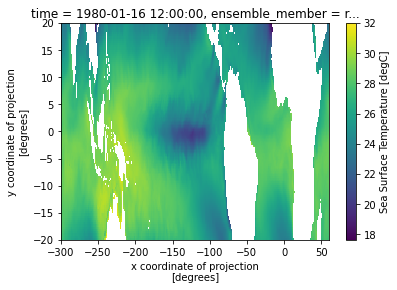

In [52]:
tropics_hist.isel(time=0).plot()

In [58]:
mean_tropics_his = (tropics_hist * areacello_tropics).sum(dim=('x', 'y')) / total_areacello_tropics

In [69]:
mean_tropics_his = mean_tropics_his.compute()

In [60]:
RSST = tos_mean_nino3_his - mean_tropics_his

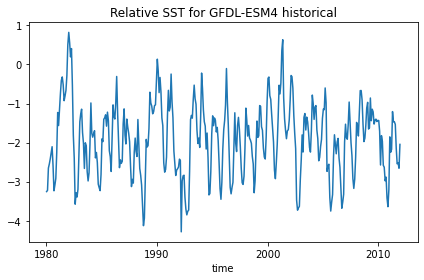

In [64]:
RSST.plot()
plt.title(f"Relative SST for {model_name} historical")
plt.tight_layout()
plt.draw()

In [65]:
rsst_climatology = RSST.groupby('time.month').mean(dim='time')

In [70]:
rsst_climatology = rsst_climatology.compute()
#rsst_climatology

In [67]:
print (rsst_climatology)

<xarray.DataArray (ensemble_member: 1, month: 12)>
array([[-1.2688135, -1.4745057, -1.595465 , -1.1905257, -1.3132042,
        -1.7056749, -1.8930068, -2.4135811, -2.7141745, -2.7351947,
        -2.6059318, -1.8951082]], dtype=float32)
Coordinates:
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'
  * month            (month) int64 1 2 3 4 5 6 7 8 9 10 11 12


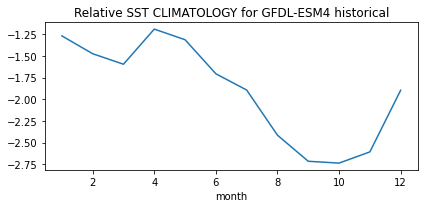

In [68]:
rsst_climatology.plot(aspect=2, size=3)
plt.title(f"Relative SST CLIMATOLOGY for {model_name} historical")
plt.tight_layout()
plt.draw()

# 1%CO2

In [60]:
ds_1pct = dict_Omon_tos["CMIP6.NOAA-GFDL.GFDL-ESM4.1pctCO2.Omon"]

In [61]:
ds_1pct.time.to_dataframe()

,time
time,
0001-01-16 12:00:00,0001-01-16 12:00:00
0001-02-15 00:00:00,0001-02-15 00:00:00
0001-03-16 12:00:00,0001-03-16 12:00:00
0001-04-16 00:00:00,0001-04-16 00:00:00
0001-05-16 12:00:00,0001-05-16 12:00:00
...,...
0150-08-16 12:00:00,0150-08-16 12:00:00
0150-09-16 00:00:00,0150-09-16 00:00:00
0150-10-16 12:00:00,0150-10-16 12:00:00


In [62]:
tm_1pct_st, tm_1pct_nd = "0119", "0150"


In [63]:
#TODO INSERT CORRECT CODE TO SELECT SPECIFIED REGION (lat range and lon range) in TOS 

tos_1pct = ds_1pct.tos.sel(y = slice(-5,5), x = slice(-150,-90), time = slice(tm_1pct_st, tm_1pct_nd))
#tos

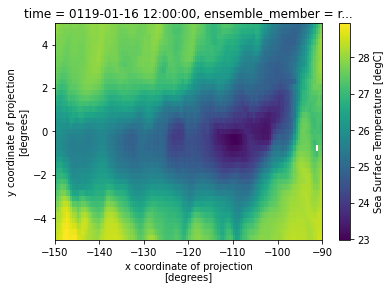

In [64]:
tos_1pct.isel(time=0).plot()

CALCULATE SEA SURFACE TEMPERATURE WEIGHTED AVERAGE

In [65]:
tos_mean_nino3_1pct = (tos_1pct * areacello_nino3).sum(dim=('x', 'y')) / total_areacello
#nino3_index.plot()

In [66]:
tos_mean_nino3_1pct = tos_mean_nino3_1pct.compute()

In [67]:
tos_mean_nino3_1pct.size

384

In [68]:
tos_mean_nino3_1pct.isel(time=0).compute()

<xarray.DataArray (ensemble_member: 1)>
array([26.335896], dtype=float32)
Coordinates:
    time             object 0119-01-16 12:00:00
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'

In [69]:
#datetimeindex_1pct = tos_mean_nino3_1pct.indexes['time'].to_datetimeindex()

In [70]:
#tos_mean_nino3_1pct['time'] = datetimeindex_1pct

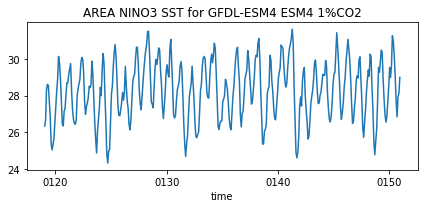

In [71]:
tos_mean_nino3_1pct.plot(aspect=2, size=3)
plt.title(f"AREA NINO3 SST for {model_name} ESM4 1%CO2")
plt.tight_layout()
plt.draw()
plt.savefig(f"{model_name}_1pctCo2_SST_{tm_1pct_st}_{tm_1pct_nd}.png")

In [72]:
tos_nino3_climatology_1pct = tos_mean_nino3_1pct.groupby('time.month').mean(dim='time')


In [73]:
tos_nino3_climatology_1pct = tos_nino3_climatology_1pct.compute()

In [74]:
print (tos_nino3_climatology_1pct)

<xarray.DataArray (ensemble_member: 1, month: 12)>
array([[28.773232, 28.884361, 29.411827, 30.26133 , 30.045776, 28.99263 ,
        27.923262, 26.73307 , 26.314209, 26.721113, 27.273369, 28.126225]],
      dtype=float32)
Coordinates:
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'
  * month            (month) int64 1 2 3 4 5 6 7 8 9 10 11 12


In [75]:
#tos_nino3_climatology_1pct.isel(month=0).plot()

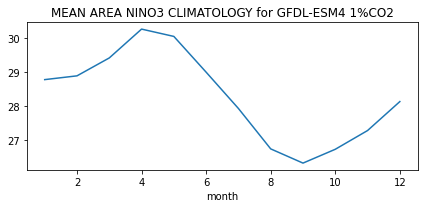

In [76]:
tos_nino3_climatology_1pct.plot(aspect=2, size=3)
plt.title(f"MEAN AREA NINO3 CLIMATOLOGY for {model_name} 1%CO2")
plt.tight_layout()
plt.draw()
plt.savefig(f"{model_name}_1pctCO2_Clima_{tm_1pct_st}_{tm_1pct_nd}.png")

monthly anomaly of SST (or TOS here) over the Nino3 region

we subtract the monthly climatology values calculated above from the TOS value values and then do
a spatial average across the region of interest

In [77]:
#tos_sel = tos_1pct.sel(time=slice('0119','0150'))
index_nino3_1pct = (tos_1pct.groupby('time.month')-tos_nino3_climatology_1pct).mean(dim=['x','y'])

In [78]:
index_nino3_1pct = index_nino3_1pct.compute()

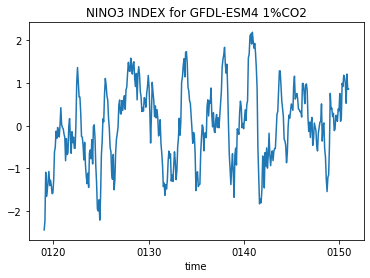

In [71]:
#datetimeindex = index_nino3.indexes['time'].to_datetimeindex()
#index_nino3['time'] = datetimeindex
index_nino3_1pct.plot()
plt.title(f"NINO3 INDEX for {model_name} 1%CO2")
plt.savefig(f"{model_name}_1pctCO2_Nino3Idx_{tm_1pct_st}_{tm_1pct_nd}.png")

In [79]:
np.save("index_nino3_1pct.npy", np.array(index_nino3_1pct))

## Abrupt-4xCO2

In [80]:
ds_4x = dict_Omon_tos["CMIP6.NOAA-GFDL.GFDL-ESM4.abrupt-4xCO2.Omon"]

In [81]:
ds_4x.time.to_dataframe()

,time
time,
0001-01-16 12:00:00,0001-01-16 12:00:00
0001-02-15 00:00:00,0001-02-15 00:00:00
0001-03-16 12:00:00,0001-03-16 12:00:00
0001-04-16 00:00:00,0001-04-16 00:00:00
0001-05-16 12:00:00,0001-05-16 12:00:00
...,...
0150-08-16 12:00:00,0150-08-16 12:00:00
0150-09-16 00:00:00,0150-09-16 00:00:00
0150-10-16 12:00:00,0150-10-16 12:00:00


In [82]:
tm_4x_st,tm_4x_nd = "0119", "0150"

In [83]:
#tos_4x = ds_4x.tos.sel(time = slice(tm_4x_st,tm_4x_nd))

In [84]:
#TODO INSERT CORRECT CODE TO SELECT SPECIFIED REGION (lat range and lon range) in TOS 
#tos = ds.tos......
tos_4x = ds_4x.tos.sel(y = slice(-5,5), x = slice(-150,-90), time = slice(tm_4x_st,tm_4x_nd) )
tos_4x

<xarray.DataArray 'tos' (ensemble_member: 1, time: 384, y: 39, x: 120)>
dask.array<getitem, shape=(1, 384, 39, 120), dtype=float32, chunksize=(1, 1, 39, 120), chunktype=numpy.ndarray>
Coordinates:
    lat              (y, x) float32 dask.array<chunksize=(39, 120), meta=np.ndarray>
    lon              (y, x) float32 dask.array<chunksize=(39, 120), meta=np.ndarray>
  * time             (time) object 0119-01-16 12:00:00 ... 0150-12-16 12:00:00
  * x                (x) float64 -149.8 -149.2 -148.8 ... -91.25 -90.75 -90.25
  * y                (y) float64 -4.872 -4.615 -4.359 ... 4.359 4.615 4.872
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'
Attributes:
    long_name:      Sea Surface Temperature
    units:          degC
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello
    standard_name:  sea_surface_temperature
    original_name:  tos

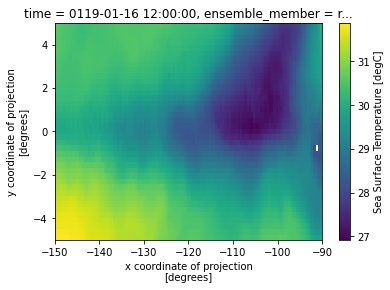

In [85]:
tos_4x.isel(time=0).plot()

CALCULATE SEA SURFACE TEMPERATURE WEIGHTED AVERAGE

In [86]:
tos_mean_nino3_4x = (tos_4x * areacello_nino3).sum(dim=('x', 'y')) / total_areacello
#nino3_index.plot()

In [87]:
tos_mean_nino3_4x = tos_mean_nino3_4x.compute()
tos_mean_nino3_4x

<xarray.DataArray (ensemble_member: 1, time: 384)>
array([[29.58265 , 29.545914, 29.789865, 29.760263, 30.47072 , 28.61071 ,
        27.548018, 26.569962, 26.206867, 26.766117, 27.13479 , 28.699945,
        29.567234, 29.050716, 29.683426, 31.148096, 30.608902, 29.321104,
        28.40773 , 27.654364, 27.30286 , 27.662489, 28.630379, 29.543715,
        29.973719, 29.68601 , 30.153143, 31.132357, 30.884155, 29.614271,
        29.066933, 27.908205, 27.960142, 29.068562, 30.080816, 30.762386,
        31.264456, 31.096386, 31.152767, 31.394222, 30.469519, 27.890974,
        26.530209, 25.839334, 24.9397  , 25.814892, 26.964832, 28.311525,
        28.385685, 28.04433 , 28.775982, 29.910473, 29.87492 , 29.058584,
        27.930819, 27.214733, 27.804314, 28.808313, 29.523348, 30.30815 ,
        30.055288, 30.57968 , 30.551325, 30.832432, 30.315554, 28.720129,
        27.71491 , 26.28313 , 26.121086, 27.205729, 27.552612, 28.548698,
        28.516987, 29.108995, 30.017864, 30.949467, 31.16389 , 30.456095,
        29.31732 , 28.295511, 27.707798, 28.428972, 28.57451 , 29.459795,
        29.72174 , 29.3743  , 30.098524, 30.19459 , 30.197096, 29.42549 ,
        28.356663, 27.024128, 26.14151 , 26.448744, 27.44287 , 28.102928,
        28.914711, 28.833933, 29.06023 , 30.035618, 30.573624, 30.095911,
        29.506298, 28.927732, 28.582054, 29.011276, 29.965511, 30.747849,
        31.061735, 30.40752 , 30.481699, 31.28532 , 31.075497, 28.881983,
        27.337015, 25.817356, 25.451572, 25.825563, 26.697166, 28.10182 ,
...
        28.42552 , 27.022623, 26.276964, 27.268215, 28.253906, 29.522041,
        29.842186, 29.671497, 30.334742, 31.431301, 30.875818, 29.245222,
        29.204403, 28.41531 , 27.652487, 27.843204, 29.082567, 30.17388 ,
        30.562645, 30.502592, 30.68847 , 31.518877, 30.361307, 28.548527,
        27.433798, 26.677856, 26.27797 , 26.495302, 27.006153, 28.081133,
        29.040216, 29.34143 , 29.711805, 30.705141, 30.193792, 29.323849,
        28.579193, 27.93861 , 26.89251 , 27.5012  , 27.926805, 29.196636,
        29.183893, 28.939735, 28.806581, 29.871935, 31.274197, 30.429695,
        29.89366 , 28.647984, 28.234253, 28.685919, 29.336103, 30.032942,
        30.46408 , 30.635733, 31.012175, 31.27108 , 30.584019, 28.867796,
        28.149563, 27.463617, 27.15974 , 27.62861 , 28.702845, 29.468824,
        30.16352 , 29.842247, 29.832186, 29.781862, 30.730078, 28.680061,
        27.798643, 26.91196 , 26.356834, 27.634104, 28.11435 , 29.443203,
        29.759413, 29.71265 , 30.015743, 31.239702, 30.748386, 29.880032,
        28.783705, 27.563871, 27.183348, 26.973207, 27.082972, 28.53207 ,
        28.827484, 28.696436, 29.14353 , 30.104414, 30.77436 , 29.261396,
        28.728634, 28.723457, 28.85243 , 29.664219, 30.912384, 31.311079,
        31.419287, 31.02583 , 31.292402, 31.516909, 31.409601, 28.821482,
        27.013773, 26.14152 , 26.531956, 26.837673, 27.146858, 28.272776]],
      dtype=float32)
Coordinates:
  * time             (time) object 0119-01-16 12:00:00 ... 0150-12-16 12:00:00
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'

In [88]:
tos_mean_nino3_4x.size #380 values, 1 value per month , 12 per year for 165 years
#it's 380 values because of time we selected for this simulation

384

In [89]:
tos_mean_nino3_4x.isel(time=0)

<xarray.DataArray (ensemble_member: 1)>
array([29.58265], dtype=float32)
Coordinates:
    time             object 0119-01-16 12:00:00
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'

In [90]:
#datetimeindex_4x = tos_mean_nino3_4x.indexes['time'].to_datetimeindex()
#tos_mean_nino3_4x['time'] = datetimeindex_4x


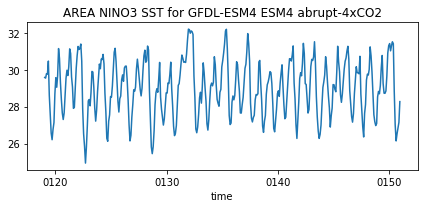

In [91]:
tos_mean_nino3_4x.plot(aspect=2, size=3)
plt.title(f"AREA NINO3 SST for {model_name} ESM4 abrupt-4xCO2")
plt.tight_layout()
plt.draw()
plt.savefig(f"{model_name}_4xCo2_SST_{tm_4x_st}_{tm_4x_nd}.png")

In [92]:
tos_nino3_climatology_4x = tos_mean_nino3_4x.groupby('time.month').mean(dim='time')


In [93]:
tos_nino3_climatology_4x = tos_nino3_climatology_4x.compute()


In [94]:
#tos_nino3_climatology_4x.isel(month=0).plot()

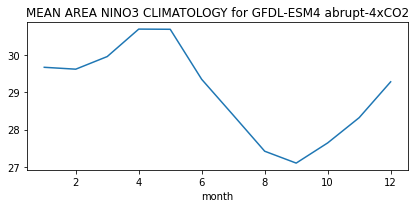

In [95]:
tos_nino3_climatology_4x.plot(aspect=2, size=3)
plt.title(f"MEAN AREA NINO3 CLIMATOLOGY for {model_name} abrupt-4xCO2")
plt.tight_layout()
plt.draw()
plt.savefig(f"{model_name}_4xCO2_Clima_{tm_1pct_st}_{tm_1pct_nd}.png")

monthly anomaly of SST (or TOS here) over the Nino3 region

we subtract the monthly climatology values calculated above from the TOS value values and then do
a spatial average across the region of interest

In [96]:
#tos_sel_4x = tos_4x.sel(time=slice('0119','0150'))
index_nino3_4x = (tos_4x.groupby('time.month')-tos_nino3_climatology_4x).mean(dim=['x','y'])

In [97]:
index_nino3_4x = index_nino3_4x.compute()

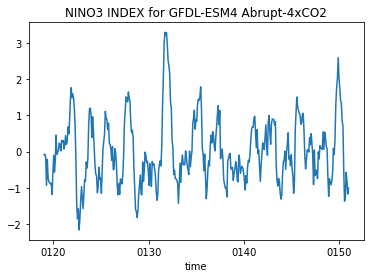

In [93]:
#datetimeindex = index_nino3.indexes['time'].to_datetimeindex()
#index_nino3['time'] = datetimeindex

index_nino3_4x.plot()
plt.title(f"NINO3 INDEX for {model_name} Abrupt-4xCO2")
plt.savefig(f"{model_name}_4xCO2_Nino3Idx_{tm_1pct_st}_{tm_1pct_nd}.png")

In [98]:
np.save("index_nino3_4x.npy", np.array(index_nino3_4x))